# Lab 4: Maximum Likelihood Estimate (MLE)

### Introduction

In this lab session we shall have a look at how to use the *Maximum Likelihood Estimate (MLE)* method to estimate the parameters of some model, given some observations $D$.

<font color="red">NOTE: </font>In the notation $\mathcal{N} (\mu, \sigma^2)$ $\mu$ refers to the mean and $\sigma^2$  the variance, not the standard deviation. The standard deviation is $\sigma = \sqrt {\sigma^2}$, i.e. for $\mathcal{N}(0.5, 0.25)$, the standard deviation is $\sigma = 0.5$.

As usual, let's import the libraries before we start by running the cell below.

In [2]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
# Necessary to import Axes3D to use `plt.subplots(subplot_kw={'projection': '3d'})`
# as this internally sets up matplotlib for 3D projection, without this import you'll 
# get an error.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# show matplotlib figures inline
%matplotlib inline

In [2]:
# By default we set figures to be 7"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(7, 4), dpi=110)
plt.rc('font', size=10)

## 1. MLE recipe

Let's suppose you're given $n$ one dimensional data points $D = \{d_0, d_1, ...,  d_{n-1} \}$ which you believe follow a normal distribution. In this case, your model has two parameters: $\mu$ and $\sigma^2$.

Given your data $D$, you wish to find the most likely parameters of the normal distribution.
Let's assume the standard deviation ($\sigma$) is 0.5, now estimate the parameter $\mu$ of the model (the mean of the normal distribution representing your data). 

Use the Maximum Likelihood Estimate (MLE) formula to show that $\mu_{ML} = \frac{1}{n}\sum_i d_i$.

**Hint**: assuming the data points are independent, we have 

$$p(D|\mu) = \prod_i p(d_i | \mu) = \prod_i \mathcal{N}(d_i|\mu, \sigma^2)$$

Additionally, since this is a convex function, we can analytically find the stationary point that maximises the function where $\frac{dp(D|\mu)}{d\mu} = 0$.

**Note:** This should be done on paper (and ideally typed up in $\LaTeX$ in the cell below), not using Python.

### Answer

Write here your answer using latex notation. Alternatively, write your solution on paper and show it to a TA.

$$
\mathcal L (\mu) = \log p(D | \mu) \\
= \sum_{i=1}^N \log p(d_i | \mu) \\

$$

## 2. MLE with Python

We know want you to write a simple program that calculates $\mu_{\text{ML}}$ using Python.

Let's now load the data from the file `data1.dat` and let's plot the histogram of the data.

(array([2., 1., 5., 9., 8., 8., 8., 4., 2., 3.]),
 array([-0.34415 , -0.144065,  0.05602 ,  0.256105,  0.45619 ,  0.656275,
         0.85636 ,  1.056445,  1.25653 ,  1.456615,  1.6567  ]),
 <BarContainer object of 10 artists>)

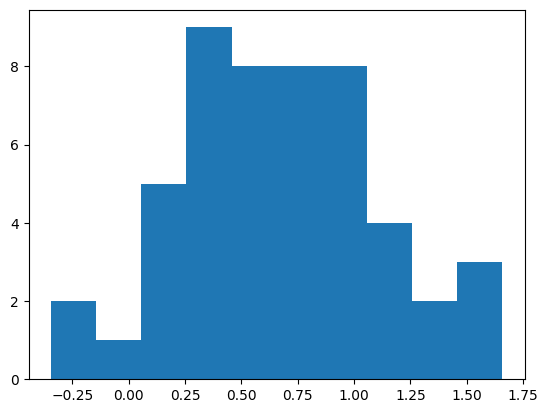

In [3]:
D = np.loadtxt('data1.dat')
plt.hist(D)

You should now see a histogram approximating a normal distribution. In fact, `data1.data` contains the observations $D$ we talked about above when deriving $\mu_\text{ML}$, which we said we believe follows a normal distribution. 

Write a function `compute_likelihood(D, mu)` that takes a value of $\mu$ and computes $p(D | \mu)$ for the data in `data1.dat`, assuming $\sigma=0.5$.

You may use NumPy's function `np.prod` for the calculation.

In [4]:
def compute_likelihood(D, mu):
  return np.prod(stats.norm.pdf(D, mu, 0.5))

Write a function `loop_likelihood(D)` that calls `compute_likelihood` for each value of $\mu \in \{0.00, 0.01, 0.02, \ldots , 1.00\}$, storing *both* the value of $\mu$ and the corresponding obtained likelihood in a 2D array so that the first column contains the value $\mu$ and the second the likelihood $p(D|\mu)$ .

In [25]:
def loop_likelihood(D):
  likelihood = []
  for mu in range(0, 101, 1):
    likelihood.append([mu/100, compute_likelihood(D, mu/100)])
  return np.array(likelihood)

print("Max Likelihood:", max(loop_likelihood(D)[:,1]))

Max Likelihood: 4.491192371239748e-14


### Questions:

- What is the value of the maximum likelihood $\text{ML} = \max p(D|\mu)$ ? 

- What is $\mu_{\text{ML}} = arg\,max_\mu \, p(D|\mu)$? 

Make sure you understand the difference between the two.

In [46]:
X = loop_likelihood(D)
uml = X[np.where(X[:,1] == max(X[:,1]))][0][0]
print("Max mu:", uml)

Max mu: 0.67


### Visual interpretation

Look at the obtained $\mu_{\text{ML}}$ and at the previously plotted histogram. Can you see any relationship between the obtained value and the histogram?

Let's now plot $\mu$ against $p(D|\mu)$, using the $\mu$ values you used to compute the likelihoods. Plot also a vertical line located at $\mu_{\text{ML}}$. Where does this line lie? Is it a meaningful position?

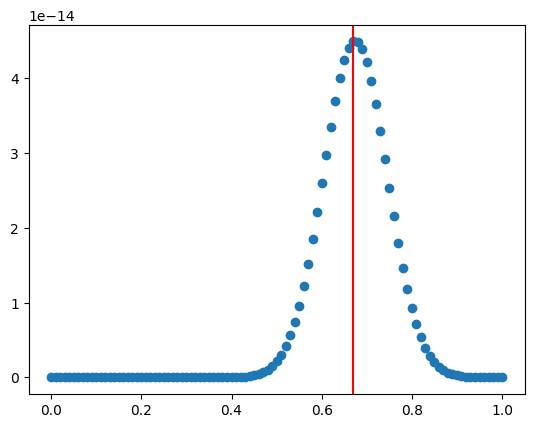

In [47]:
plt.scatter(X[:,0], X[:,1])
plt.axvline(uml, color='r')  # Add vertical line at x=0.5


### Comparison with MLE recipe

Now implement the MLE recipe for $\mu_\text{ML}$ you solved at the beginning of this sheet to find the value of $\mu_{ML}$ (note that this should be just one line of code!).

Compare this value with that obtained previously. Do the values match? 

In [49]:
numl = (1/D.size)*np.sum(D)
print(numl)

0.6742339399999999


# 3. Posterior probability

Let's suppose now we have some prior knowledge regarding our parameter $\mu$. More precisely, our belief is that the probability density function (pdf) $p(\mu)$ modelling our parameter is also given by a normal distribution.

Assuming that $\mu \sim \mathcal{N}(0.5,0.01)$, write two functions, `compute_posterior(D, mu)` and `loop_posterior(D)`, to find $\mu_{\text{MAP}} = \arg \max_{\mu} p(D|\mu)p(\mu)$.

In [15]:
# write your code here

### Visual interpretation


Now plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$ similar to the graph below.
![MLE](mle.png)

In [17]:
# write your code here

Repeat now the above calculations for `data2.dat` and `data3.dat`. 

For both files, plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$.

In [19]:
# write your code here

### Question

Observe the results obtained on `data2.dat`.

## EXTRA 1

Until now, you assumed that our data was generated from a normal distribution with $\sigma^2 = 0.25$. 

Remove this assumption and estimate $\theta_{\text{MAP}} = [\mu_{\text{MAP}}, \sigma_{\text{MAP}}]$ experimentally by looping through different values of $\mu$ and $\sigma$. 

Assume the pdf $p(\sigma)$ is given by $\mathcal{N}(0.5, 0.16)$.

You may need to use `np.nanargmax` instead of `np.argmax`.

In [21]:
# write your code here

## EXTRA 2

Plot ($\mu$, $\sigma$) against $p(D|\theta)p(\theta)$ similar to the mesh graph below (use the function `Axes3D.plot_surface`).
![MLE mesh](mle2.png)

In [23]:
# write your code here